In [17]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [3]:
def load_data(data_dir, labels_map):
    data = []
    labels = []
    
    for sub_dir in os.listdir(data_dir):
        sub_dir_path = os.path.join(data_dir, sub_dir)
        label = labels_map[sub_dir] # each breed
  
        for image_filename in os.listdir(sub_dir_path):
            image_path = os.path.join(sub_dir_path, image_filename)
            image = cv2.imread(image_path)
            if image is not None:
                image_gray = image / 255.0 # gray scaling
                image_resized = cv2.resize(image_gray, (64, 64)) # resizing
                data.append(image_resized)
                labels.append(label)
        print(f"{sub_dir} loading process is done")
    
    return data, labels

In [4]:
data_dir = r'Breed-classification-dataset\Data'
#test_dir = r'Breed-classification-dataset\Cats-and-Dogs-Breed-Dataset-main\TEST'

# Map contains all labels
labels_map = {sub_dir: label for label, sub_dir in enumerate(os.listdir(data_dir))}

data, data_labels = load_data(data_dir=data_dir, labels_map=labels_map)
#test_data, test_labels = load_data(data_dir=test_dir, labels_map=labels_map)

data, labels = np.array(data), np.array(data_labels)
#test_data, test_labels = np.array(test_data), np.array(test_labels)

print('\nLoaing process is done')

abyssinian loading process is done
american_bulldog loading process is done
american_pit_bull_terrier loading process is done
basset_hound loading process is done
beagle loading process is done
bengal loading process is done
birman loading process is done
bombay loading process is done
boxer loading process is done
british_shorthair loading process is done
chihuahua loading process is done
egyptian_mau loading process is done
english_cocker_spaniel loading process is done
english_setter loading process is done
german_shorthaired loading process is done
great_pyrenees loading process is done
havanese loading process is done
japanese_chin loading process is done
keeshond loading process is done
leonberger loading process is done
maine_coon loading process is done
miniature_pinscher loading process is done
newfoundland loading process is done
persian loading process is done
pomeranian loading process is done
pug loading process is done
ragdoll loading process is done
russian_blue loading 

In [5]:
df = pd.DataFrame({'images': data, 'labels': labels})
df_shuffled = df.sample(frac=1).reset_index(drop=True)

df_shuffled.head()

,images,labels
0,"[[[0.5933517156862745, 0.6003982843137254, 0.6...",16
1,"[[[0.9538373161764706, 0.92255859375, 0.896220...",33
2,"[[[0.59228515625, 0.5833505667892156, 0.540213...",34
3,"[[[0.29218941482843136, 0.5592850030637255, 0....",1
4,"[[[0.324868834252451, 0.5562768075980392, 0.40...",34


In [25]:
df_shuffled.shape

(5884, 2)

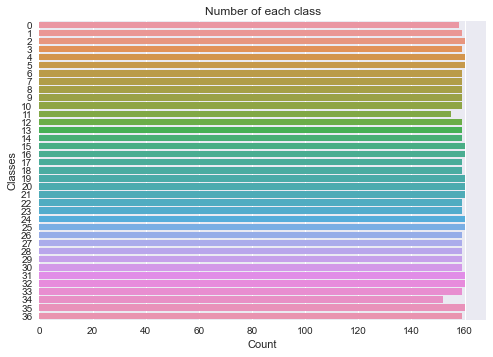

In [6]:
ax = sns.countplot(y=df_shuffled['labels'], data=df_shuffled)

# Annotating the count of each class
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_y() + p.get_height() / 2., p.get_width()),
                ha='center', va='bottom', fontsize=12, color='black')


plt.xlabel('Count')
plt.ylabel('Classes')
plt.title('Number of each class')

plt.show()

In [7]:
X, y= df_shuffled['images'].tolist(), df_shuffled['labels']

train_size, val_size, test_size = 0.75, 0.15, 0.1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_size/(test_size + val_size))

In [12]:
# Convert the pandas Series x_train into a NumPy array
x_train_array = np.array(x_train.tolist())
x_val_array = np.array(x_val.tolist())
x_test_array = np.array(x_test.tolist())

# Reshape the NumPy array into a 2D format
x_train_flattened = x_train_array.reshape(x_train_array.shape[0], -1)
x_val_flattened = x_val_array.reshape(x_val_array.shape[0], -1)
x_test_flattened = x_test_array.reshape(x_test_array.shape[0], -1)

In [ ]:
#param_grid = {'n_neighbors': [3,5,7,9],
 #            'weights': ['uniform', 'distance'],
  #           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
   #           metric': ['euclidean', 'manhattan', 'chebyshev']}

# Using the extensive param_grid took a long time- I skupped it due to lack of time

param_grid = {'n_neighbors': [3,5,7,9],
             'metric': ['euclidean', 'manhattan', 'chebyshev']}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_flattened, y_train)

In [ ]:
best_params = grid_search.best_params_
print(best_params)
print(grid_search.best_score_)

knn_best = grid_search.best_estimator_
knn_best.fit(x_train_flattened, y_train)

In [ ]:
val_accuracy = knn_best.score(x_val_flattened, y_val)
print(f"Val accuracy: {val_accuracy:.2f}")

In [ ]:
prediction = knn_best.predict(x_test_flattened)
predicted_labels = (prediction > 0.5).astype(int)

print(classification_report(y_true=y_test, y_pred=predicted_labels))